In [ ]:
#!pip install bioinfokit

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import math
import numpy as np
import seaborn as sns
import pandas as pd
from bioinfokit.analys import stat

plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cek Kenormalan

In [ ]:
def CekNormal (data):
    """Sebelum melakukan uji Anova, Sebaiknya data diuji dulu kenormalannya.
    Hal ini jelas karena asumsi dari ANOVA adalah data berdistribusi normal"""
    
    #Ubah data ke dalam long_format
    long_format = data.melt()
    
    #seluruh kategori yang ada
    kategories = long_format['variable'].unique()
    
    #Kita menguji value untuk setiap kategori
    for kategori in kategories :
        print('Kelompok '+kategori)
        
        #ambil datanya
        nilai_kategori=long_format[long_format['variable']==kategori]['value']
        #uji
        print(stats.shapiro(nilai_kategori))

## Cek Kesamaan Varians

In [ ]:
def CekHomogenitas(data, alfa=0.05):
    """Salah satu asumsi ANOVA adalah kesamaan varians.
    Dengan begini, kita harus lakukan uji kesamaan varians dahulu sebelum melakukan uji anova."""
    
    #Buat kedalam long format
    long_format = data.melt()
    
    #buat fungsi untuk stat()
    res=stat()
    #gunakan levene
    res.levene(df=long_format,
              res_var='value',
              xfac_var='variable')
    
    #hasil levene
    print(res.levene_summary)

## Uji ANOVA

In [ ]:
def anova(data, alfa=0.05):
    """data yang diinput merupakan pandas DataFrame.
    
    Sebelum melakukan uji ini, perlu diperhatikan bahwa harus dipenuhi beberapa asumsi berikut:
    1. Populasi harus berasal dari distribusi normal.
    2. Populasi haruslah memiliki varians yang sama.
    3. Sampel harus diambil secara independen.
    
    Uji anova dilakukan dengan cara menggunakan soal latihan mata kuliah Probabilitas dan Statistika berikut:
   
    Seorang petugas ingin melihat apakah ada perbedaan signifikan pada jumlah pegawai di tiap 
    gerbang tol yang membatasi 3 negara bagian. Data tersedia dibawah ini. Dengan α = 0.05,
    dapatkah di konklusikan bahwa ada perbedaan signifikan dari jumlah rata-rata pegawai pada 
    gerbang tol """
    
    #mencari n dan k
    for kolom in data.columns:
        n=len(data[kolom])
        k=len(data.columns)
        break
        
    #mencari rata-rata tiap populasi
    means=[]
    for kolom in data.columns:
        means.append(data[kolom].mean())
        
    #mencari rata-rata total
    mean_total=0
    for mean in means:
        mean_total=mean_total+mean
    mean_total=mean_total/len(means)
    
    #mencari varians antarpopulasi
    var_sampel_antar_populasi=0
    for mean in means:
        var_sampel_antar_populasi=var_sampel_antar_populasi+(mean-mean_total)**2
    var_sampel_antar_populasi = n*var_sampel_antar_populasi/(len(means)-1) #ini yang akan digunakan sebagai pembilang
    
    #mencari standar deviasi tiap populasi
    var_sampels_dalam_populasi=[]
    for kolom in data.columns:
        var_sampels_dalam_populasi.append(data[kolom].var(ddof=1))
    
    #rata_rata std_sampel dalam populasi
    var_sampel_dalam_populasi=0
    for var in var_sampels_dalam_populasi:
        var_sampel_dalam_populasi=var_sampel_dalam_populasi+var
        
    var_sampel_dalam_populasi=var_sampel_dalam_populasi/len(var_sampels_dalam_populasi) #ini yang akan digunakan sebagai penyebut
    
    #print(var_sampel_antar_populasi)
    #print(var_sampel_dalam_populasi)
    
    F=var_sampel_antar_populasi/var_sampel_dalam_populasi
    degree_of_freedom_pembilang=k-1
    degree_of_freedom_penyebut=k*(n-1)
    critical=stats.f.ppf(1-alfa, dfn=degree_of_freedom_pembilang, dfd=degree_of_freedom_penyebut)
    
    # Kita plot datanya, pertama-tama buat dulu menjadi long_format
    
    long_format = data.melt()
    sns.boxplot(x='variable',
                y='value',
                data=long_format)
    plt.xlabel('Kelompok')
    plt.title('Boxplot Data')
    
    #hasil kesimpulan
    tolak_h0 = True if F>critical else False
    if tolak_h0:
        print(f"nilai F={F}, nilai critical={critical}")
        print("H0 ditolak")
    else:
        print(f"nilai F={F}, nilai critical={critical}")
        print("H0 gagal ditolak")

## Data Uji

In [ ]:
x1=[7, 14, 32, 19, 10, 11]
x2=[10, 1, 1, 0, 11, 1]
x3=[1, 12, 1, 9, 1, 11]
coba=pd.DataFrame({'tumpike':x1,
                  'bypass':x2,
                  'expressway':x3})
coba

,tumpike,bypass,expressway
0,7,10,1
1,14,1,12
2,32,1,1
3,19,0,9
4,10,11,1
5,11,1,11


In [ ]:
CekNormal(coba)

Kelompok tumpike
(0.8691214919090271, 0.2227257788181305)
Kelompok bypass
(0.7198642492294312, 0.009942309930920601)
Kelompok expressway
(0.7737154960632324, 0.03365766257047653)


In [ ]:
CekHomogenitas(coba)

                 Parameter   Value
0      Test statistics (W)  0.5030
1  Degrees of freedom (Df)  2.0000
2                  p value  0.6146


nilai F=5.035417684416219, nilai critical=3.6823203436732412
H0 ditolak, rata-rata dari populasi tidak semuanya sama 


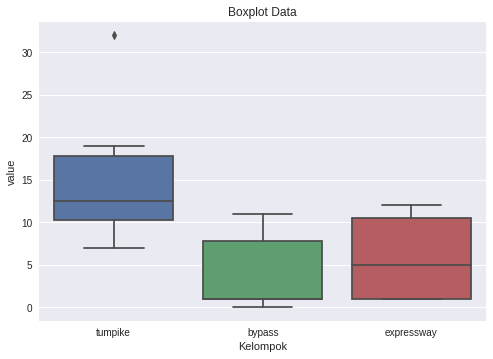

In [ ]:
anova(data=coba, alfa=0.05)